# 1. IMPORT REQUIRED LIBRARIES

In [29]:
# -----------------------------
# Core data handling
# -----------------------------
import pandas as pd
import numpy as np
import os

# -----------------------------
# Visualization
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# -----------------------------
# Preprocessing
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Styling
# -----------------------------
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="IPython")



# 2. LOAD DATASETS


In [2]:
# Load training data (contains target variable: price)
train_df = pd.read_excel("Downloads/train(1).xlsx")

# Load test data (no target variable)
test_df = pd.read_excel("Downloads/test2.xlsx")

print("Training shape:", train_df.shape)
print("Test shape    :", test_df.shape)


Training shape: (16209, 21)
Test shape    : (5404, 20)


# 3. BASIC DATA CHECKS

In [3]:
# Preview data
train_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [4]:
# Dataset structure
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [5]:
# Statistical summary
train_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.620900e+04,1.620900e+04,16209.00000,16209.000000,16209.000000,1.620900e+04,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000,16209.000000
mean,4.575771e+09,5.374703e+05,3.36782,2.113054,2073.274601,1.486767e+04,1.498828,0.006971,0.234253,3.407860,7.652971,1784.754396,288.520205,1971.152755,82.738108,98077.974767,47.560707,-122.214003,1983.152261,12735.572707
std,2.874661e+09,3.603036e+05,0.93327,0.765242,907.009491,3.882570e+04,0.543032,0.083206,0.763152,0.651553,1.171050,821.820844,438.598910,29.372698,397.861148,53.355282,0.138340,0.140093,681.905161,26933.162012
min,1.000102e+06,7.500000e+04,0.00000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.200000e+05,3.00000,1.500000,1430.000000,5.004000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.472500,-122.328000,1480.000000,5098.000000
50%,3.904950e+09,4.500000e+05,3.00000,2.250000,1910.000000,7.599000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572400,-122.230000,1840.000000,7620.000000
75%,7.304301e+09,6.400000e+05,4.00000,2.500000,2550.000000,1.063100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.000000,10053.000000
max,9.900000e+09,7.700000e+06,33.00000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16209 entries, 0 to 16208
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16209 non-null  int64  
 1   date           16209 non-null  object 
 2   price          16209 non-null  int64  
 3   bedrooms       16209 non-null  int64  
 4   bathrooms      16209 non-null  float64
 5   sqft_living    16209 non-null  int64  
 6   sqft_lot       16209 non-null  int64  
 7   floors         16209 non-null  float64
 8   waterfront     16209 non-null  int64  
 9   view           16209 non-null  int64  
 10  condition      16209 non-null  int64  
 11  grade          16209 non-null  int64  
 12  sqft_above     16209 non-null  int64  
 13  sqft_basement  16209 non-null  int64  
 14  yr_built       16209 non-null  int64  
 15  yr_renovated   16209 non-null  int64  
 16  zipcode        16209 non-null  int64  
 17  lat            16209 non-null  float64
 18  long  

In [7]:
# Missing value check
train_df.isnull().sum()[train_df.isnull().sum() > 0]

Series([], dtype: int64)

### Observation (Markdown):

- No missing values present
- Numeric-only dataset
- Suitable for direct scaling

# 4. TABULAR  EDA

## Price Distribution

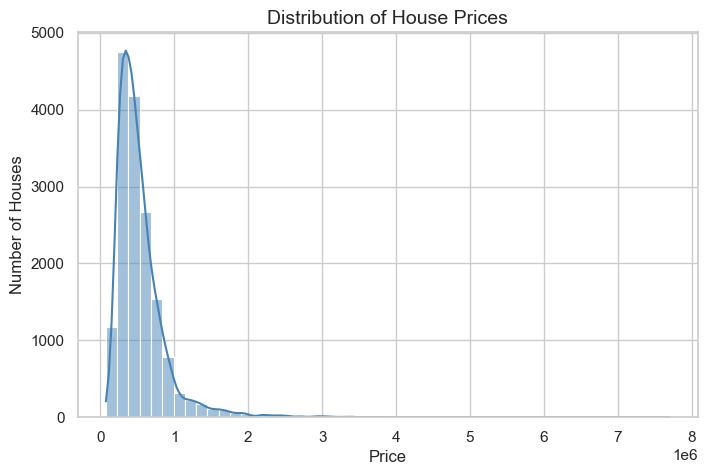

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(
    train_df["price"],
    bins=50,
    kde=True,
    color="steelblue"
)
plt.title("Distribution of House Prices", fontsize=14)
plt.xlabel("Price")
plt.ylabel("Number of Houses")
plt.show()

### Observations:

- Price distribution is highly right-skewed
- Majority of houses lie in the lower price range
- Few luxury properties create a long tail
- Conclusion: Log transformation is necessary for stable regression.

##  Log-Transformed Price Distribution

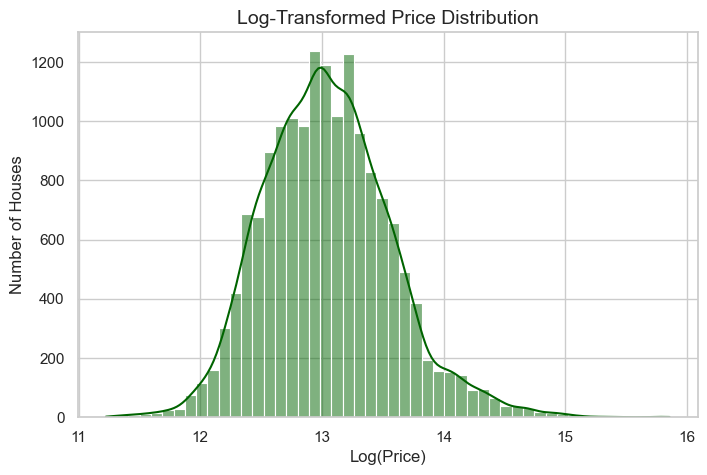

In [9]:
train_df["price_log"] = np.log1p(train_df["price"])
plt.figure(figsize=(8, 5))
sns.histplot(
    train_df["price_log"],
    bins=50,
    kde=True,
    color="darkgreen"
)
plt.title("Log-Transformed Price Distribution", fontsize=14)
plt.xlabel("Log(Price)")
plt.ylabel("Number of Houses")
plt.show()


### Observations:

- Distribution becomes more symmetric
- Extreme values have less influence
- Better suited for regression models

## Living Area vs Price

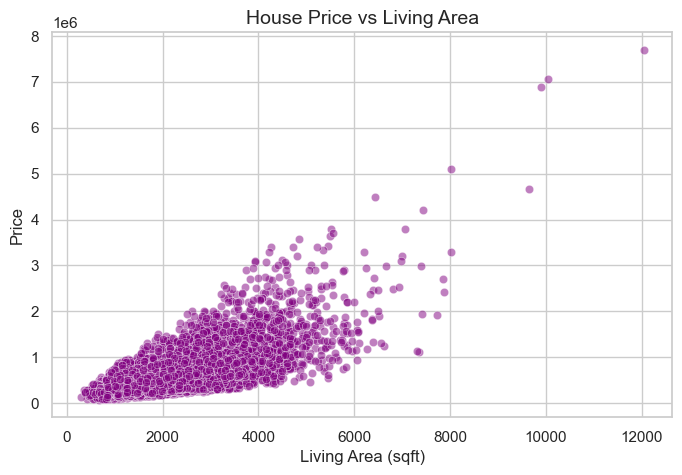

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=train_df["sqft_living"],
    y=train_df["price"],
    alpha=0.5,
    color="purple"
)
plt.title("House Price vs Living Area", fontsize=14)
plt.xlabel("Living Area (sqft)")
plt.ylabel("Price")
plt.show()

### Observations:

- Strong positive relationship
- Larger houses generally cost more
- Variance increases for larger houses
- **This is one of the strongest predictors.**

## Waterfront Effect

/var/folders/w7/qvtdyfws4y7_sqlssgqq5y2w0000gn/T/ipykernel_12465/2668217925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


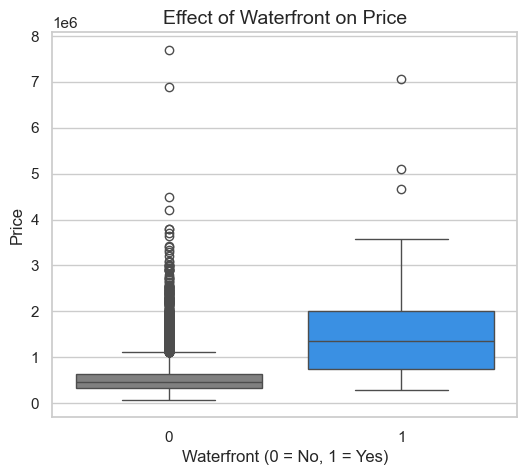

In [11]:
plt.figure(figsize=(6, 5))
sns.boxplot(
    x=train_df["waterfront"],
    y=train_df["price"],
    palette=["gray", "dodgerblue"]
)
plt.title("Effect of Waterfront on Price", fontsize=14)
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("Price")
plt.show()

### Observations:

- Waterfront properties are significantly more expensive
- Clear separation between the two groups
- **This validates why visual features are important.**

## Geographic Distribution

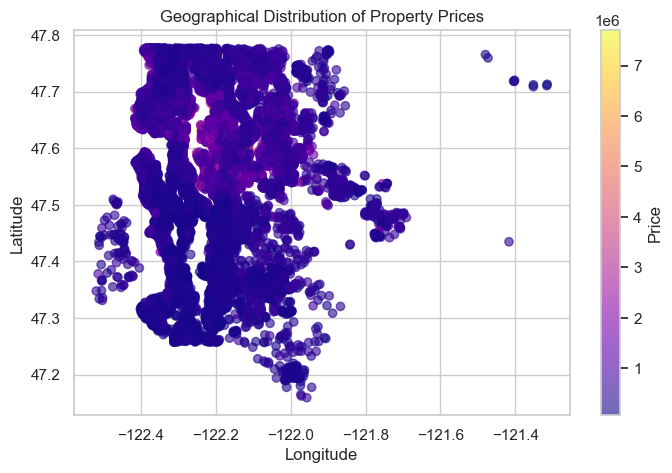

In [12]:
plt.scatter(
    train_df["long"],
    train_df["lat"],
    c=train_df["price"],
    cmap="plasma",
    alpha=0.6
)
plt.colorbar(label="Price")
plt.title("Geographical Distribution of Property Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

## Correlation Heatmap

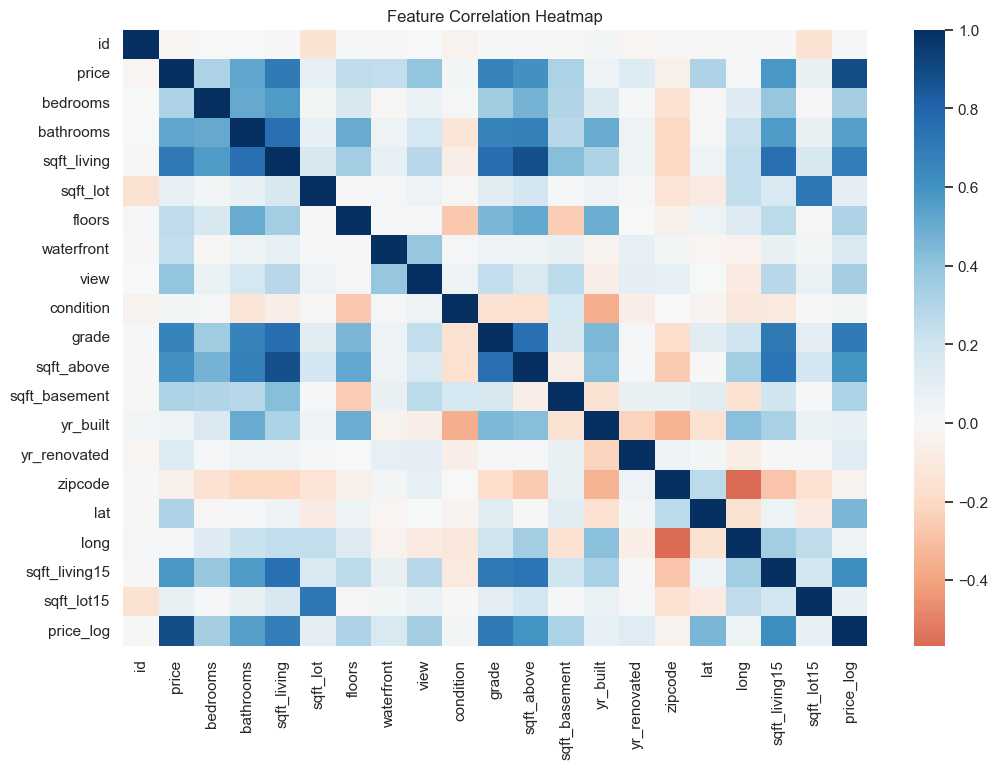

In [13]:
numeric_df = train_df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
sns.heatmap(
    numeric_df.corr(),
    cmap="RdBu",
    center=0
)
plt.title("Feature Correlation Heatmap")
plt.show()


### Observations:

- sqft_living, grade, bathrooms highly correlated with price
- Location variables show moderate correlation
- Some multicollinearity exists (acceptable)

# 5. SATELLITE IMAGE LOADING 

In [14]:
# Image directories (already downloaded earlier)
TRAIN_IMG_DIR = "data_cdc/satellite_images/train"
TEST_IMG_DIR  = "data_cdc/satellite_images/test"

# Attach image paths
train_df["image_path"] = train_df.index.map(
    lambda idx: os.path.join(TRAIN_IMG_DIR, f"{idx}.png")
)

test_df["image_path"] = test_df.index.map(
    lambda idx: os.path.join(TEST_IMG_DIR, f"{idx}.png")
)


# 6. SATELLITE IMAGE EDA

## Low vs High Price Image Comparison

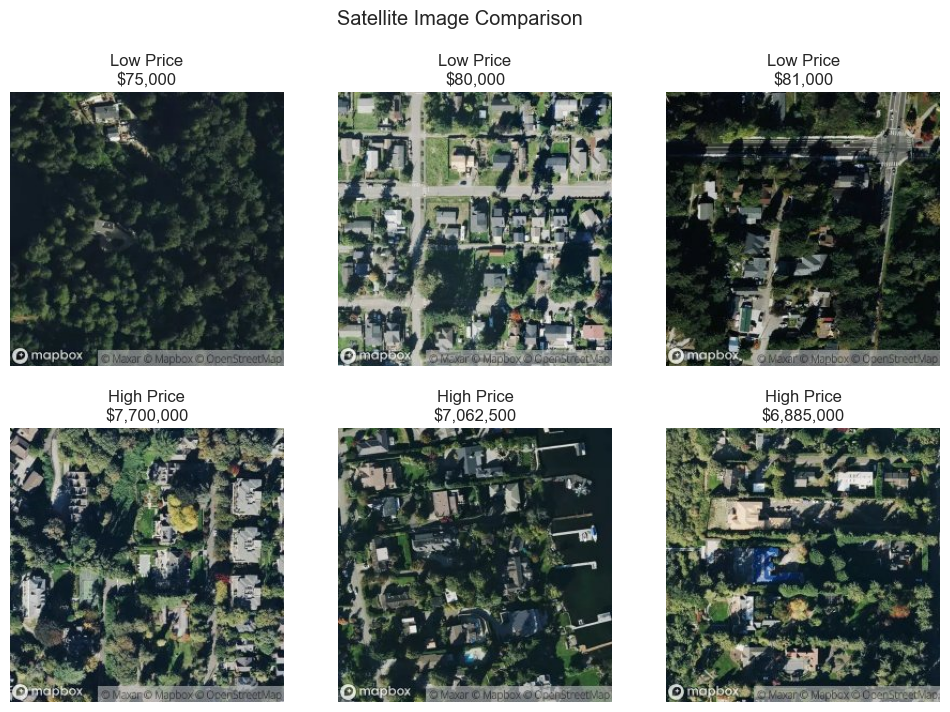

In [15]:
low_price  = train_df.nsmallest(3, "price")
high_price = train_df.nlargest(3, "price")

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, (_, row) in enumerate(low_price.iterrows()):
    img = Image.open(row["image_path"])
    axes[0, i].imshow(img)
    axes[0, i].set_title(f"Low Price\n${row['price']:,}")
    axes[0, i].axis("off")

for i, (_, row) in enumerate(high_price.iterrows()):
    img = Image.open(row["image_path"])
    axes[1, i].imshow(img)
    axes[1, i].set_title(f"High Price\n${row['price']:,}")
    axes[1, i].axis("off")

plt.suptitle("Satellite Image Comparison")
plt.show()


### Observations:

- High-priced properties show greener areas, water proximity, larger plots

- Confirms value of satellite imagery

# 7. FEATURE SELECTION (TABULAR)

In [16]:
TABULAR_FEATURES = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "waterfront",
    "view",
    "condition",
    "grade",
    "sqft_above",
    "sqft_basement",
    "lat",
    "long"
]

X = train_df[TABULAR_FEATURES]
y = train_df["price_log"]

# 8. TRAIN–VALIDATION SPLIT

In [17]:
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# 9. FEATURE SCALING

In [18]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)

In [19]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_val_scaled   = pd.DataFrame(X_val_scaled, columns=X.columns)

In [20]:
os.makedirs("data_cdc", exist_ok=True)

X_train_scaled.to_csv("data_cdc/X_train_tabular.csv", index=False)
X_val_scaled.to_csv("data_cdc/X_val_tabular.csv", index=False)

y_train.to_csv("data_cdc/y_train.csv", index=False)
y_val.to_csv("data_cdc/y_val.csv", index=False)

test_df[TABULAR_FEATURES].to_csv(
    "data_cdc/X_test_tabular.csv",
    index=False
)

In [21]:
test_df[TABULAR_FEATURES].shape

(5404, 13)

# 10. CNN & MODEL SETUP

In [22]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import numpy as np
from tqdm import tqdm
import os

In [23]:
IMAGE_SIZE = 224

image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])


# Dataset Preparation

In [24]:
class SatelliteDataset(Dataset):
    def __init__(self, image_paths, transform):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]

        if img_path is None:
            # Handle missing images safely
            return torch.zeros(3, IMAGE_SIZE, IMAGE_SIZE)

        image = Image.open(img_path).convert("RGB")
        return self.transform(image)


In [25]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

resnet = models.resnet18(pretrained=True)

# Remove final classification layer
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])

resnet.to(device)
resnet.eval()


/Users/payilimeenakshi/myenv/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/payilimeenakshi/myenv/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

# Feature Extraction

In [26]:
def extract_embeddings(image_paths, batch_size=32):
    dataset = SatelliteDataset(image_paths, image_transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    embeddings = []

    with torch.no_grad():
        for batch in tqdm(loader):
            batch = batch.to(device)
            features = resnet(batch)
            features = features.view(features.size(0), -1)
            embeddings.append(features.cpu().numpy())

    return np.vstack(embeddings)

# Save Embeddings

In [27]:
X_train_images = extract_embeddings(train_df["image_path"].tolist())
X_test_images = extract_embeddings(test_df["image_path"].tolist())


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 169/169 [01:30<00:00,  1.87it/s]


In [30]:
os.makedirs("data_cdc", exist_ok=True)
np.save("data_cdc/X_train_image_embeddings.npy", X_train_images)
np.save("data_cdc/X_test_image_embeddings.npy", X_test_images)

print("Feature extraction completed successfully!")

Feature extraction completed successfully!
